In [1]:
!pip3 install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data, meta = arff.loadarff('breast-cancer.arff')

In [5]:
converters = dict()
_ = [converters.update({column:dtype}) for column,dtype in zip(meta.names(),meta.types())]

In [6]:
df = pd.DataFrame(data=data, columns=meta.names())

In [7]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,"b""'40-49'""","b""'premeno'""","b""'15-19'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_up'""","b""'no'""","b""'recurrence-events'"""
1,"b""'50-59'""","b""'ge40'""","b""'15-19'""","b""'0-2'""","b""'no'""","b""'1'""","b""'right'""","b""'central'""","b""'no'""","b""'no-recurrence-events'"""
2,"b""'50-59'""","b""'ge40'""","b""'35-39'""","b""'0-2'""","b""'no'""","b""'2'""","b""'left'""","b""'left_low'""","b""'no'""","b""'recurrence-events'"""
3,"b""'40-49'""","b""'premeno'""","b""'35-39'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_low'""","b""'yes'""","b""'no-recurrence-events'"""
4,"b""'40-49'""","b""'premeno'""","b""'30-34'""","b""'3-5'""","b""'yes'""","b""'2'""","b""'left'""","b""'right_up'""","b""'no'""","b""'recurrence-events'"""


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null object
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
Class          286 non-null object
dtypes: object(10)
memory usage: 22.4+ KB


In [9]:
print(df.isnull().values.sum())

0


In [10]:
print(df['age'].value_counts())

b"'50-59'"    96
b"'40-49'"    90
b"'60-69'"    57
b"'30-39'"    36
b"'70-79'"     6
b"'20-29'"     1
Name: age, dtype: int64


In [11]:
print(df['age'].value_counts().count())

6


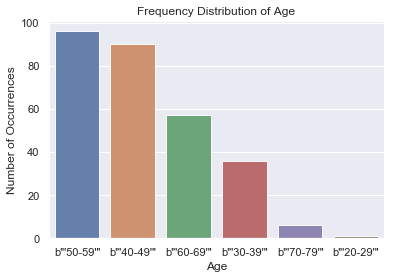

In [14]:
age_count = df['age'].value_counts()
sns.set(style="darkgrid")
sns.barplot(age_count.index, age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

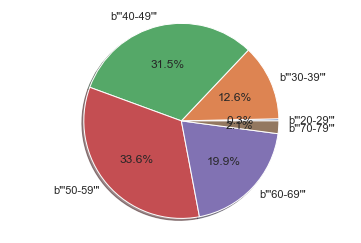

In [13]:
labels = df['age'].astype('category').cat.categories.tolist()
counts = df['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['age'], prefix = ['Age'])
df.head()

,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,"Age_b""'20-29'""","Age_b""'30-39'""","Age_b""'40-49'""","Age_b""'50-59'""","Age_b""'60-69'""","Age_b""'70-79'"""
0,"b""'premeno'""","b""'15-19'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_up'""","b""'no'""","b""'recurrence-events'""",0,0,1,0,0,0
1,"b""'ge40'""","b""'15-19'""","b""'0-2'""","b""'no'""","b""'1'""","b""'right'""","b""'central'""","b""'no'""","b""'no-recurrence-events'""",0,0,0,1,0,0
2,"b""'ge40'""","b""'35-39'""","b""'0-2'""","b""'no'""","b""'2'""","b""'left'""","b""'left_low'""","b""'no'""","b""'recurrence-events'""",0,0,0,1,0,0
3,"b""'premeno'""","b""'35-39'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_low'""","b""'yes'""","b""'no-recurrence-events'""",0,0,1,0,0,0
4,"b""'premeno'""","b""'30-34'""","b""'3-5'""","b""'yes'""","b""'2'""","b""'left'""","b""'right_up'""","b""'no'""","b""'recurrence-events'""",0,0,1,0,0,0
